### Trabalho 1

Seguem instruções:

1) Baixar dataset em : https://www.kaggle.com/c/home-credit-default-risk/data

2) Explorar, conforme instruções:

* 'application_train.csv': Esse csv possui 122 colunas: explorar 40 colunas, sendo as primeiras 30 obrigatórias e 10 adicionais a escolher
* 30 colunas obrigatórias:

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']
       
* alunos deverão se organizar para que todas as colunas sejam exploradas
* escolher dois arquivos, para exploração e join/merge/concat com o 'application_train.csv'

['HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'application_train.csv',
 'bureau.csv',
 'previous_application.csv',
 'bureau_balance.csv',
 'sample_submission.csv']
 
3) objetivos:
* entendimento do problema de negócio
* carregamento do dataset
* identificação e tratamento de NaN
* exploração univariadaj, bivariada
* visualizações
* insights de negócio
* formatação do dataset para algoritmos de machine learning
* criação de features: agregação de dados, junção de dois ou mais dataframes

4) entregável: jupyter notebook. Não será necessário apresentação em powerpoint, nem relatório.

5) entrega limite: 8/agosto/2018 

6) trabalho individual. Haverá aplicação sistema anti-plágio nas submissões. (http://www.fgv.br/mailing/codigo-etica-conduta/24/)
   suspeitas de plágio estarão sujeitos a arguição oral de 5 mins por aluno no ultimo dia de aula (11/agosto/2018),

7) avaliação:
   - jupyter notebook e arguição (se houver)

### Problema de Negócio

##### Do Kaggle:
Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

##### Entendimento do problema:

Como fornecer crédito para pessoas com histórico insuficiente ou inexistente?

Utilizando estes dados alternativos, pode ser criado um modelo preditivo quer será usado para fazer uma análise das pessoas, para saber se elas tem um histórico de bom pagamento, e fornecer crédito para estas pessoas.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import missingno as mn

import seaborn as sns

pd.__version__



'0.23.3'

In [3]:
df = pd.read_csv('application_train.csv', index_col=0)

In [3]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(307511, 121)

In [5]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 121 columns):
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_POPULATION_RELATIVE      307511 non-null float64


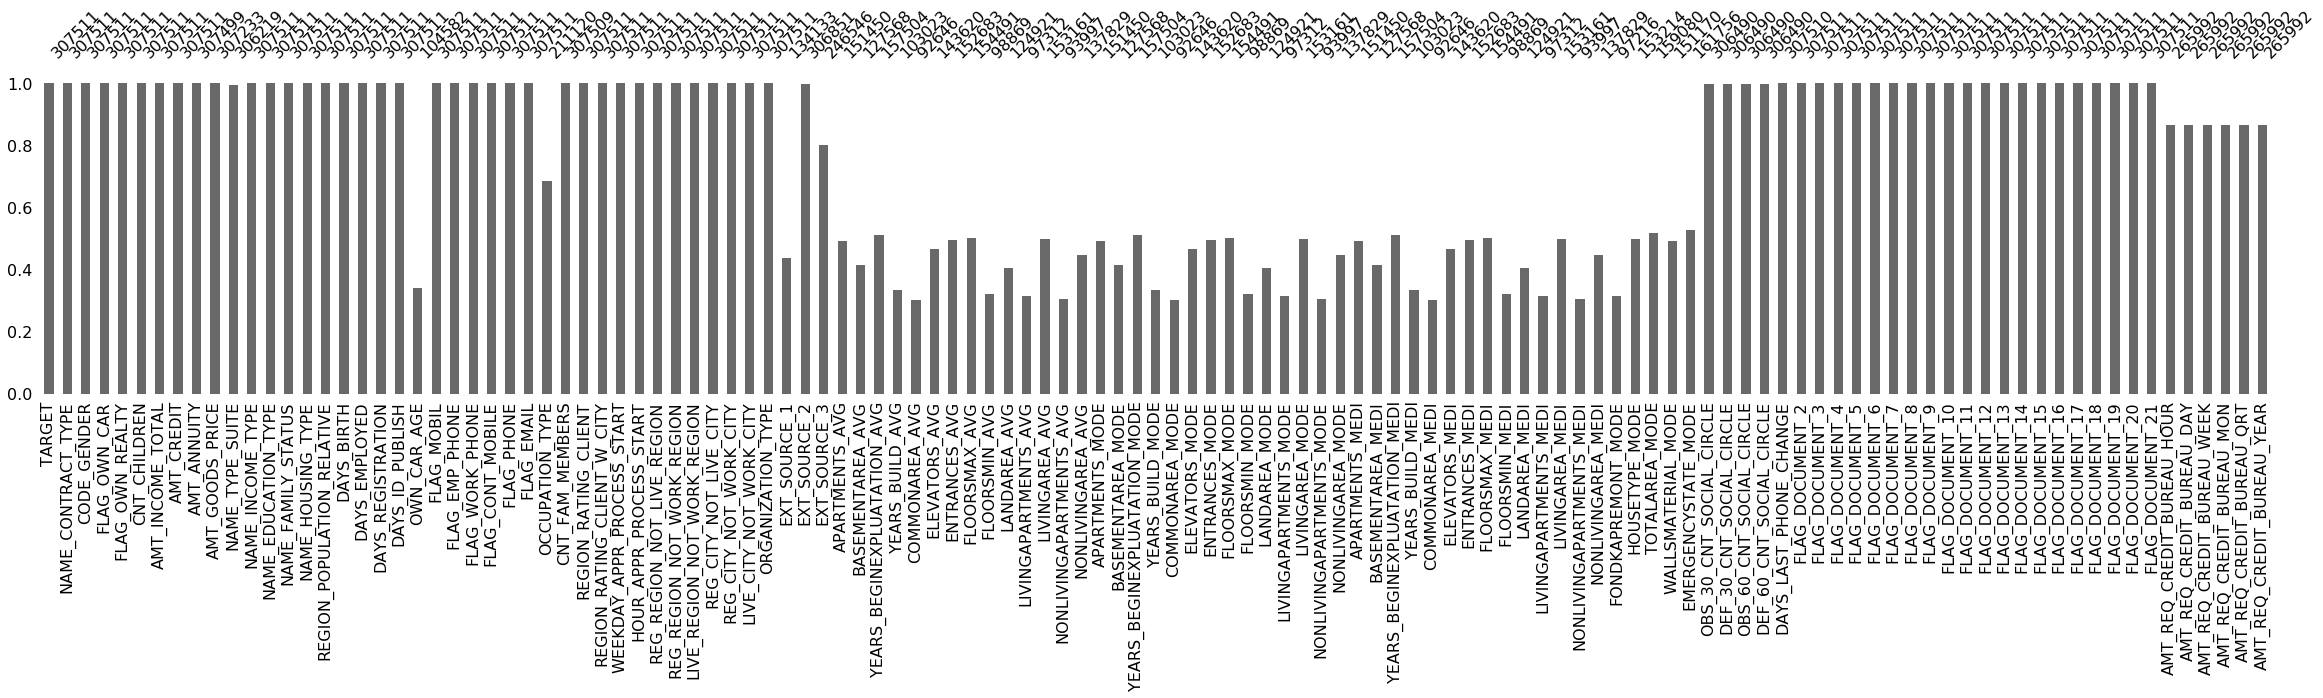

In [6]:
mn.bar(df,figsize=(40,6))

In [ ]:
df.corr()

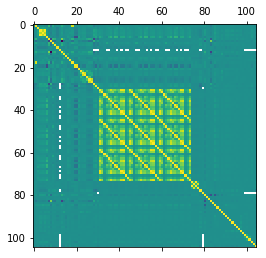

In [7]:
plt.matshow(df.corr())

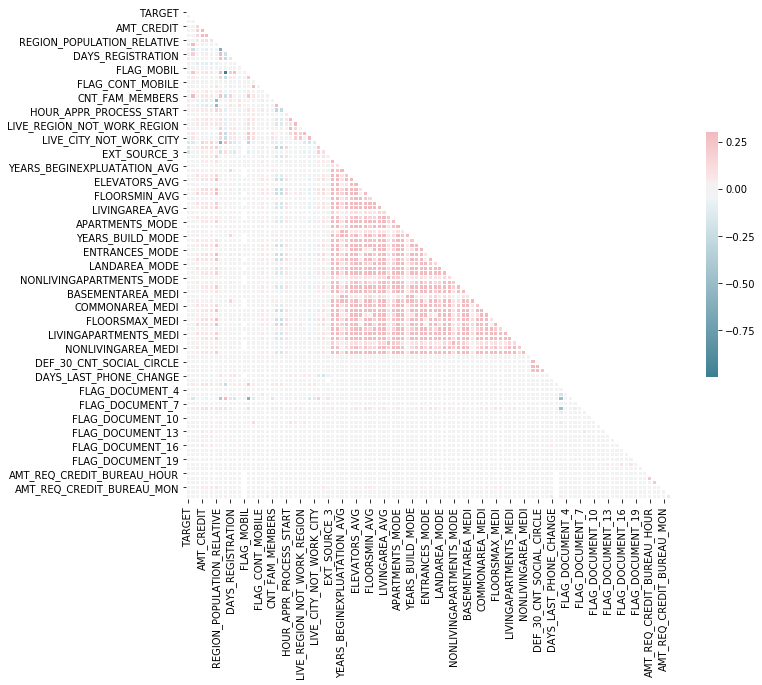

In [8]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#for i in range(df.columns.size):
#    print(i)
#    print(df[pd.isnull(df[df.columns[i]])]).sum()

##### Analisando as variáveis relativas a CARROS e removendo NaN de OWN_CAR_AGE baseado na FLAG_OWN_CAR

Foi observado que quando a pessoa não possuia carro ('FLAG_OWN_CAR'='N') o valor de 'OWN_CAR_AGE'=NaN 

In [9]:
#df[pd.isnull(df['OWN_CAR_AGE'])]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,405000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100014,0,Cash loans,F,N,Y,1,112500.000,652500.0,21177.0,652500.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [4]:
df.loc[:,['FLAG_OWN_CAR','OWN_CAR_AGE']].head(20)

,FLAG_OWN_CAR,OWN_CAR_AGE
SK_ID_CURR,,
100002,N,NaN
100003,N,NaN
100004,Y,26.0
100006,N,NaN
100007,N,NaN
100008,N,NaN
100009,Y,17.0
100010,Y,8.0
100011,N,NaN


Substituindo NaN por 0, para indicar que não existe carro

In [5]:
df.OWN_CAR_AGE.fillna(0, inplace = True)

In [12]:
df.loc[:,['FLAG_OWN_CAR','OWN_CAR_AGE']]

,FLAG_OWN_CAR,OWN_CAR_AGE
SK_ID_CURR,,
100002,N,0.0
100003,N,0.0
100004,Y,26.0
100006,N,0.0
100007,N,0.0
100008,N,0.0
100009,Y,17.0
100010,Y,8.0
100011,N,0.0


In [6]:
df.to_csv('application_train_T1.csv')

In [7]:
df.iloc[:,0:40].head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,1,MONDAY,11,0,0,0,0,0,0,School
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,2,MONDAY,9,0,0,0,0,0,0,Government
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,2,THURSDAY,11,0,0,0,0,1,1,Religion


In [8]:
df40 = df.iloc[:,0:40]

In [9]:
df40.to_csv('application_train_40cols.csv')

In [10]:
df40 = pd.read_csv('application_train_40cols.csv')

In [11]:
df40.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,2,THURSDAY,11,0,0,0,0,1,1,Religion


In [18]:
df40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 40 columns):
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH       

In [12]:
df40.loc[:,['CNT_CHILDREN',lambda df40: df40['NAME_FAMILY_STATUS'] == 'Unknown','CNT_FAM_MEMBERS']]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,CNT_CHILDREN,<function <lambda> at 0x1124fdc80>,CNT_FAM_MEMBERS
0,0,NaN,1.0
1,0,NaN,2.0
2,0,NaN,1.0
3,0,NaN,2.0
4,0,NaN,1.0
5,0,NaN,2.0
6,1,NaN,3.0
7,0,NaN,2.0
8,0,NaN,2.0
9,0,NaN,1.0


In [13]:
set(df40.NAME_FAMILY_STATUS)

{'Civil marriage',
 'Married',
 'Separated',
 'Single / not married',
 'Unknown',
 'Widow'}

{'Civil marriage' = 2,
 'Married' = 2,
 'Separated' = 1,
 'Single / not married' = 1,
 'Unknown' = CNT_FAM_MEMBERS - CNT_CHILDREN,
 'Widow' = 1}

In [14]:
df40.CNT_FAM_MEMBERS[3] - df40.CNT_CHILDREN[3]

2.0

In [15]:
df40['NAME_FAMILY_STATUS_NO'] = np.nan

for i in df40.index:
    if df40.NAME_FAMILY_STATUS[i] == 'Civil marriage': 
        df40.NAME_FAMILY_STATUS_NO[i] = 2
    elif df40.NAME_FAMILY_STATUS[i] == 'Married': 
        df40.NAME_FAMILY_STATUS_NO[i] = 2
    elif df40.NAME_FAMILY_STATUS[i] == 'Separated': 
        df40.NAME_FAMILY_STATUS_NO[i] = 1
    elif df40.NAME_FAMILY_STATUS[i] == 'Single / not married': 
        df40.NAME_FAMILY_STATUS_NO[i] = 1
    elif df40.NAME_FAMILY_STATUS[i] == 'Unknown': 
        df40.NAME_FAMILY_STATUS_NO[i] = (df40.CNT_FAM_MEMBERS[i] - df40.CNT_CHILDREN[i])
    elif df40.NAME_FAMILY_STATUS[i] == 'Widow': 
        df40.NAME_FAMILY_STATUS_NO[i] = 1
#df40.append(NAME_FAMILY_STATUS_NO, values)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

KeyboardInterrupt: 

In [ ]:
#df40.NAME_FAMILY_STATUS_NO

df40.loc[:,['CNT_CHILDREN',lambda df40: df40['NAME_FAMILY_STATUS'] == 'Unknown','CNT_FAM_MEMBERS','NAME_FAMILY_STATUS_NO']]

In [ ]:
mn.matrix(df40)

In [ ]:
df40[pd.isnull(df40['CNT_FAM_MEMBERS'])]


In [ ]:
dfna = pd.read_csv('application_train.csv', index_col=0)

In [ ]:
dfna.dropna(inplace=True)

In [ ]:
df.shape

In [ ]:
dfna.shape

# TESTES

In [16]:
df40T = pd.read_csv('application_train_40cols.csv')

{'Civil marriage' = 2,
 'Married' = 2,
 'Separated' = 1,
 'Single / not married' = 1,
 'Unknown' = CNT_FAM_MEMBERS - CNT_CHILDREN,
 'Widow' = 1}

In [22]:
df40T[df40T.NAME_FAMILY_STATUS == 'Civil marriage'] = 2
df40T[df40T.NAME_FAMILY_STATUS == 'Married'] = 2
df40T[df40T.NAME_FAMILY_STATUS == 'Separated'] = 1
df40T[df40T.NAME_FAMILY_STATUS == 'Single / not married'] = 1
df40T[df40T.NAME_FAMILY_STATUS == 'Widow'] = 1
#df40T[df40T.NAME_FAMILY_STATUS == 'Unknown'] = df40T[df40T.CNT_FAM_MEMBERS] - df40T[df40T.CNT_CHILDREN]

for i in df40.index:
    if df40.NAME_FAMILY_STATUS[i] == 'Unknown': 
        df40.NAME_FAMILY_STATUS_NO[i] = (df40.CNT_FAM_MEMBERS[i] - df40.CNT_CHILDREN[i])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [31]:
df40T.loc[:,['CNT_CHILDREN','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 3 columns):
CNT_CHILDREN          307511 non-null int64
NAME_FAMILY_STATUS    307511 non-null object
CNT_FAM_MEMBERS       307509 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.0+ MB


In [40]:
#df40T.loc[:,'CNT_FAM_MEMBERS'].isnull()
pd.isnull(df40T).any(1).nonzero()[0]

array([ 41982, 187348])

In [41]:
df40T.loc[[41982,187348],['CNT_CHILDREN','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS']]

,CNT_CHILDREN,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS
41982,0,Unknown,NaN
187348,0,Unknown,NaN


In [44]:
df40T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307511 non-null float64
AMT_GOODS_PRICE                307509 non-null float64
NAME_TYPE_SUITE                307509 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

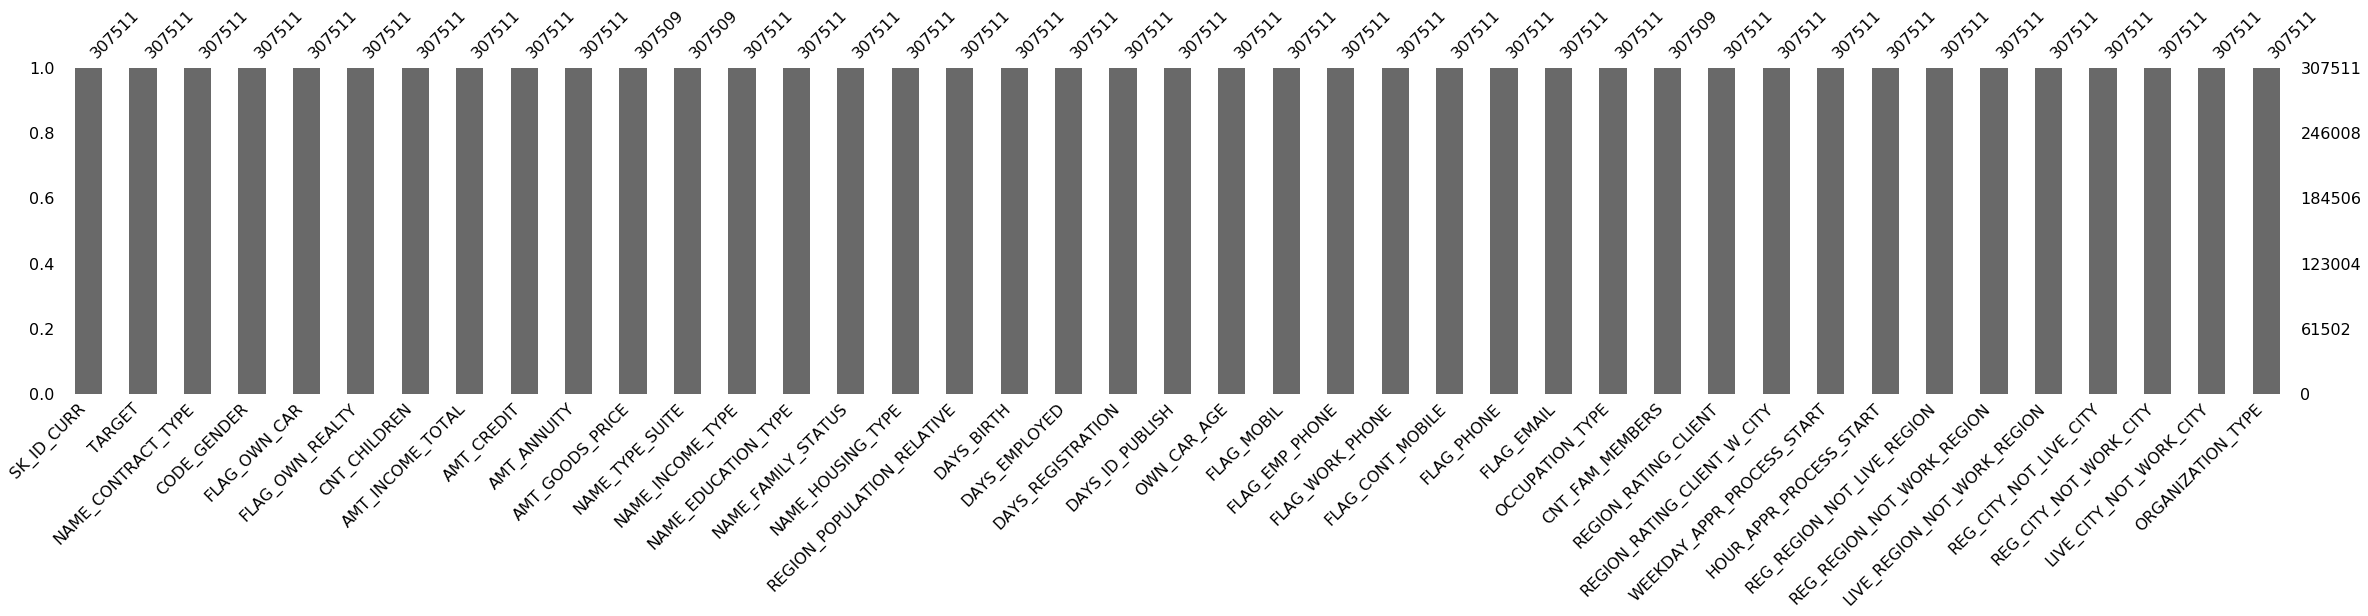

In [45]:
mn.bar(df40T,figsize=(40,6))